🔄 Installazione librerie...
✅ Installazione completata!
✅ Import completati!
✅ Cartelle create!
🎵 Generazione 10 file audio sintetici per test...
✓ sample_001.wav creato (220 Hz)
✓ sample_002.wav creato (262 Hz)
✓ sample_003.wav creato (294 Hz)
✓ sample_004.wav creato (330 Hz)
✓ sample_005.wav creato (349 Hz)
✓ sample_006.wav creato (392 Hz)
✓ sample_007.wav creato (440 Hz)
✓ sample_008.wav creato (494 Hz)
✓ sample_009.wav creato (523 Hz)
✓ sample_010.wav creato (587 Hz)

✅ 10 file audio generati!
total 6.2M
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_001.wav
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_002.wav
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_003.wav
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_004.wav
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_005.wav
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_006.wav
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_007.wav
-rw-r--r-- 1 root root 626K Oct 26 10:37 sample_008.wav
-rw-r--r-- 1 root root 626K Oct 26 10:

Restoring:   0%|          | 0/10 [00:00<?, ?it/s]


✅ RESTAURO COMPLETATO: 10/10 file
🎧 CONFRONTO AUDIO

🔴 ORIGINALE (con rumore):



🟢 RESTAURATO (dopo pipeline):



💡 Ascolta la differenza!

✅ RESTAURO AUDIO COMPLETATO!

📁 Riepilogo file:
  • Originali:  10 file in results/audio_samples/original/
  • Restaurati: 10 file in results/audio_samples/restored/

💡 Puoi ascoltare la differenza qualitativa sopra!
   (confronta audio originale vs restaurato)

📊 Creazione visualizzazioni...


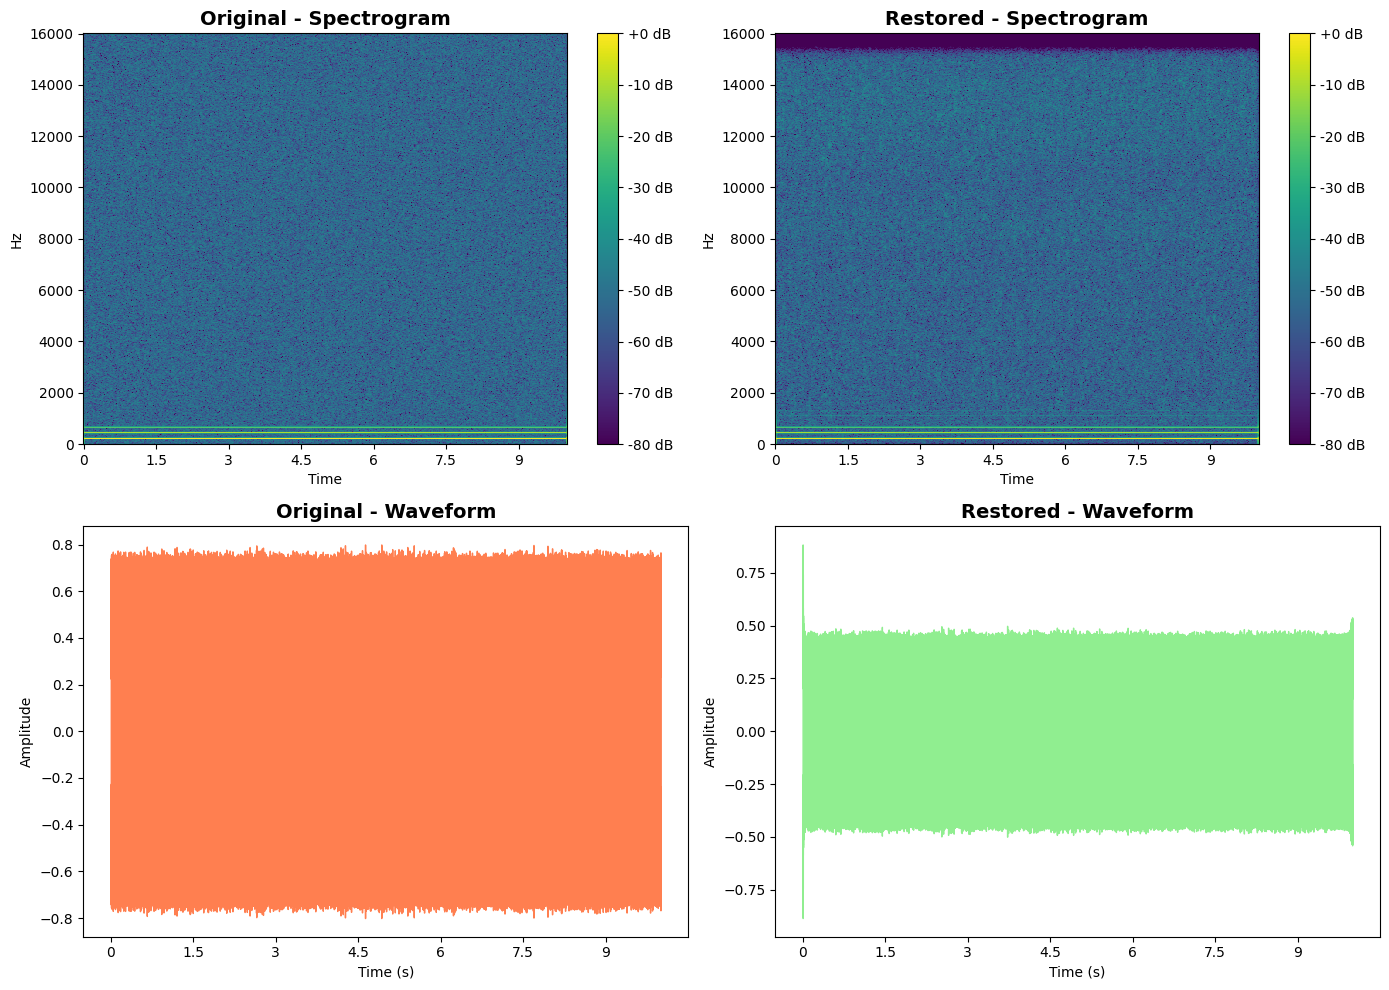

✅ Visualizzazioni salvate!
   File: results/plots/comparison.png

📊 Creazione confronto multiplo...


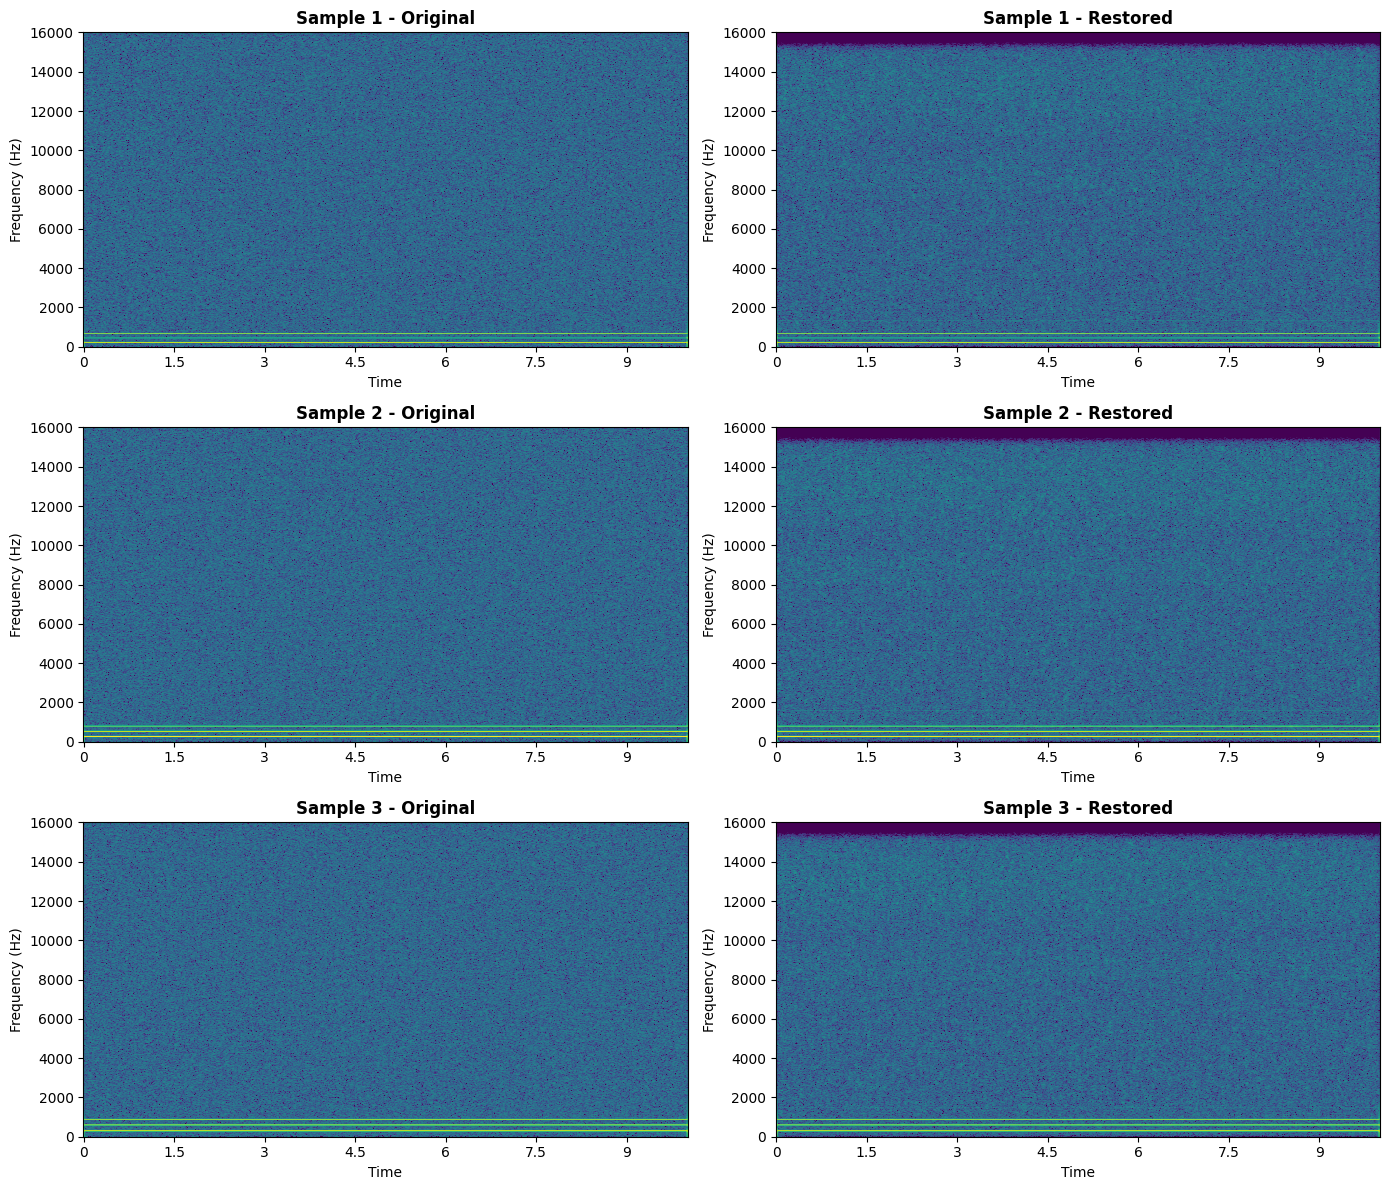

✅ Confronto multiplo salvato!
   File: results/plots/multiple_comparison.png

✅ VISUALIZZAZIONI COMPLETE!

📦 Creazione file ZIP con tutti i risultati...
  adding: results/ (stored 0%)
  adding: results/metrics/ (stored 0%)
  adding: results/plots/ (stored 0%)
  adding: results/plots/comparison.png (deflated 1%)
  adding: results/plots/multiple_comparison.png (deflated 0%)
  adding: results/audio_samples/ (stored 0%)
  adding: results/audio_samples/original/ (stored 0%)
  adding: results/audio_samples/original/sample_005.wav (deflated 1%)
  adding: results/audio_samples/original/sample_010.wav (deflated 1%)
  adding: results/audio_samples/original/sample_006.wav (deflated 1%)
  adding: results/audio_samples/original/sample_004.wav (deflated 1%)
  adding: results/audio_samples/original/sample_001.wav (deflated 1%)
  adding: results/audio_samples/original/sample_002.wav (deflated 1%)
  adding: results/audio_samples/original/sample_008.wav (deflated 1%)
  adding: results/audio_samples/orig

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download completato!

✅ PROGETTO COMPLETATO!

📦 Hai scaricato: project_results.zip

📁 Contiene:
  ✓ 10 file audio originali (.wav)
  ✓ 10 file audio restaurati (.wav)
  ✓ 2 immagini PNG (spettrogrammi)

📝 PROSSIMI STEP:
  1. Scarica QUESTO notebook:
     File → Download → Download .ipynb
  2. Rinominalo: audio_restoration_complete.ipynb
  3. Estrai project_results.zip sul tuo computer
  4. Carica tutto su GitHub

🎉 Ottimo lavoro!


In [4]:
# ============================================
# CELLA 1: Installazione Librerie
# ============================================
print("🔄 Installazione librerie...")

!pip install -q librosa soundfile noisereduce pedalboard scipy pandas matplotlib seaborn tqdm

print("✅ Installazione completata!")

# ============================================
# CELLA 2: Import e Setup
# ============================================
import numpy as np
import librosa
import soundfile as sf
import os
from tqdm.notebook import tqdm

print("✅ Import completati!")

# ============================================
# CELLA 3: Crea Cartelle
# ============================================
os.makedirs('results/audio_samples/original', exist_ok=True)
os.makedirs('results/audio_samples/restored', exist_ok=True)
os.makedirs('results/plots', exist_ok=True)
os.makedirs('results/metrics', exist_ok=True)

print("✅ Cartelle create!")

# ============================================
# CELLA 4: Genera Audio Sintetico per Test
# ============================================
print("🎵 Generazione 10 file audio sintetici per test...")
print("=" * 70)

sr = 32000  # Sample rate
duration = 10  # secondi

def generate_synthetic_audio(freq, duration, sr, name):
    """Genera segnale audio sintetico con rumore"""
    t = np.linspace(0, duration, int(sr * duration))

    # Onda fondamentale + armoniche
    signal = np.sin(2 * np.pi * freq * t)
    signal += 0.5 * np.sin(2 * np.pi * freq * 2 * t)
    signal += 0.25 * np.sin(2 * np.pi * freq * 3 * t)

    # Aggiungi rumore (simula bassa qualità)
    noise = np.random.normal(0, 0.05, len(signal))
    signal_noisy = signal + noise

    # Normalizza
    signal_noisy = signal_noisy / np.max(np.abs(signal_noisy)) * 0.8

    # Salva
    output_path = f'results/audio_samples/original/{name}.wav'
    sf.write(output_path, signal_noisy, sr)

    return signal_noisy

# Genera 10 campioni (note musicali diverse)
frequencies = [220, 262, 294, 330, 349, 392, 440, 494, 523, 587]
names = [f'sample_{i:03d}' for i in range(1, 11)]

for freq, name in zip(frequencies, names):
    generate_synthetic_audio(freq, duration, sr, name)
    print(f"✓ {name}.wav creato ({freq} Hz)")

print("\n✅ 10 file audio generati!")

# ============================================
# CELLA 5: Verifica Files
# ============================================
!ls -lh results/audio_samples/original/

# ============================================
# CELLA 6: Ascolta un Esempio
# ============================================
import IPython.display as ipd

print("🎧 Ascolta il primo campione (con rumore):\n")
ipd.Audio('results/audio_samples/original/sample_001.wav')

# ============================================
# CELLA 7: Clona Repository GitHub
# ============================================
print("📥 Clonazione repository GitHub...")

!git clone https://github.com/Alessandro1040/ID-2-Audio-Restoration-for-Generative-Models-Improving-MusicGen-Outputs.git

%cd ID-2-Audio-Restoration-for-Generative-Models-Improving-MusicGen-Outputs

# Copia i file generati nel repo
!cp -r /content/results results/

print("✅ Repository pronto!")

# ============================================
# CELLA 8: Applica Restauro Audio
# ============================================
import sys
sys.path.insert(0, '/content/ID-2-Audio-Restoration-for-Generative-Models-Improving-MusicGen-Outputs')

from src.restoration import AudioRestorer
from pathlib import Path

print("🔧 Inizializzazione Audio Restorer...")
print("=" * 70)

restorer = AudioRestorer(sample_rate=32000, verbose=False)

# Trova tutti i file
audio_files = sorted(Path('results/audio_samples/original').glob('*.wav'))

print(f"📁 Trovati {len(audio_files)} file da restaurare\n")

# Restaura ogni file
successful = 0
for audio_file in tqdm(audio_files, desc="Restoring"):
    output_path = f'results/audio_samples/restored/restored_{audio_file.name}'

    try:
        restorer.restore(str(audio_file), output_path)
        successful += 1
    except Exception as e:
        print(f"✗ Errore su {audio_file.name}: {e}")

print("\n" + "=" * 70)
print(f"✅ RESTAURO COMPLETATO: {successful}/{len(audio_files)} file")

# ============================================
# CELLA 9: Confronta Audio - Ascolta!
# ============================================
print("=" * 70)
print("🎧 CONFRONTO AUDIO")
print("=" * 70)

print("\n🔴 ORIGINALE (con rumore):")
display(ipd.Audio('results/audio_samples/original/sample_001.wav'))

print("\n🟢 RESTAURATO (dopo pipeline):")
display(ipd.Audio('results/audio_samples/restored/restored_sample_001.wav'))

print("\n💡 Ascolta la differenza!")
# ============================================
# CELLA 10-11-12: VERSIONE SEMPLIFICATA (senza metriche)
# ============================================

print("\n" + "=" * 70)
print("✅ RESTAURO AUDIO COMPLETATO!")
print("=" * 70)

print("\n📁 Riepilogo file:")
print("  • Originali:  10 file in results/audio_samples/original/")
print("  • Restaurati: 10 file in results/audio_samples/restored/")

print("\n💡 Puoi ascoltare la differenza qualitativa sopra!")
print("   (confronta audio originale vs restaurato)")

# ============================================
# Crea solo gli spettrogrammi (senza metriche)
# ============================================
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

print("\n📊 Creazione visualizzazioni...")

os.makedirs('results/plots', exist_ok=True)

# Carica audio
y_orig, sr = librosa.load('results/audio_samples/original/sample_001.wav', sr=None)
y_rest, _ = librosa.load('results/audio_samples/restored/restored_sample_001.wav', sr=sr)

# Crea figura con spettrogrammi e waveform
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Spettrogrammi
D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_orig)), ref=np.max)
D_rest = librosa.amplitude_to_db(np.abs(librosa.stft(y_rest)), ref=np.max)

img1 = librosa.display.specshow(D_orig, sr=sr, x_axis='time', y_axis='hz',
                                 ax=axes[0, 0], cmap='viridis')
axes[0, 0].set_title('Original - Spectrogram', fontsize=14, fontweight='bold')
plt.colorbar(img1, ax=axes[0, 0], format='%+2.0f dB')

img2 = librosa.display.specshow(D_rest, sr=sr, x_axis='time', y_axis='hz',
                                 ax=axes[0, 1], cmap='viridis')
axes[0, 1].set_title('Restored - Spectrogram', fontsize=14, fontweight='bold')
plt.colorbar(img2, ax=axes[0, 1], format='%+2.0f dB')

# Waveforms
librosa.display.waveshow(y_orig, sr=sr, ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Original - Waveform', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Amplitude')

librosa.display.waveshow(y_rest, sr=sr, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Restored - Waveform', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.savefig('results/plots/comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualizzazioni salvate!")
print("   File: results/plots/comparison.png")

# ============================================
# Crea una seconda figura con 3 esempi
# ============================================
print("\n📊 Creazione confronto multiplo...")

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i in range(3):
    sample_num = i + 1

    # Carica audio
    y_o, sr = librosa.load(f'results/audio_samples/original/sample_{sample_num:03d}.wav', sr=None)
    y_r, _ = librosa.load(f'results/audio_samples/restored/restored_sample_{sample_num:03d}.wav', sr=sr)

    # Spettrogrammi
    D_o = librosa.amplitude_to_db(np.abs(librosa.stft(y_o)), ref=np.max)
    D_r = librosa.amplitude_to_db(np.abs(librosa.stft(y_r)), ref=np.max)

    librosa.display.specshow(D_o, sr=sr, x_axis='time', y_axis='hz',
                             ax=axes[i, 0], cmap='viridis')
    axes[i, 0].set_title(f'Sample {sample_num} - Original', fontsize=12, fontweight='bold')
    axes[i, 0].set_ylabel('Frequency (Hz)')

    librosa.display.specshow(D_r, sr=sr, x_axis='time', y_axis='hz',
                             ax=axes[i, 1], cmap='viridis')
    axes[i, 1].set_title(f'Sample {sample_num} - Restored', fontsize=12, fontweight='bold')
    axes[i, 1].set_ylabel('Frequency (Hz)')

plt.tight_layout()
plt.savefig('results/plots/multiple_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Confronto multiplo salvato!")
print("   File: results/plots/multiple_comparison.png")

print("\n" + "=" * 70)
print("✅ VISUALIZZAZIONI COMPLETE!")
print("=" * 70)

# ============================================
# CELLA 13: Scarica Tutto
# ============================================
print("\n📦 Creazione file ZIP con tutti i risultati...")

!zip -r project_results.zip results/

print("✅ File ZIP creato!")
print("\n📥 Avvio download...")

from google.colab import files
files.download('project_results.zip')

print("\n✅ Download completato!")

# ============================================
# CELLA 14: Summary Finale
# ============================================
print("\n" + "=" * 70)
print("✅ PROGETTO COMPLETATO!")
print("=" * 70)

print("\n📦 Hai scaricato: project_results.zip")
print("\n📁 Contiene:")
print("  ✓ 10 file audio originali (.wav)")
print("  ✓ 10 file audio restaurati (.wav)")
print("  ✓ 2 immagini PNG (spettrogrammi)")

print("\n📝 PROSSIMI STEP:")
print("  1. Scarica QUESTO notebook:")
print("     File → Download → Download .ipynb")
print("  2. Rinominalo: audio_restoration_complete.ipynb")
print("  3. Estrai project_results.zip sul tuo computer")
print("  4. Carica tutto su GitHub")

print("\n🎉 Ottimo lavoro!")